In [2]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

import matplotlib.pyplot as plt
import pandas as pd 
import geopandas as gpd
from agents.realtor import RealtorAgent
from agents.housing_unit import HousingUnitAgent

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

from model import BSRIModel


model_params = {
    'tax_rate_vacancy': 0.01,
    'tax_rate_property': 0.01,
    'tax_rate_property_vacant': 0.01,
    'tax_rate_transfer': 0.01,
    'file': '../neighbourhoods_clean.geojson',

}

m = BSRIModel(**model_params)
m.schedule.step_breed(HousingUnitAgent, step_name='record_data')

for i in range(20):
    m.step()

m.schedule.step_breed(RealtorAgent, step_name='record_state')


>>>>> initialized with 5427 housing units
>>>>> -------------- SIMULATION COMPLETE AFTER 20 STEPS


In [4]:
neighbourhoods = m.datacollector.get_table_dataframe('neighbourhoods')

geo_neighbourhoods = gpd.GeoDataFrame(neighbourhoods)
geo_neighbourhoods = geo_neighbourhoods.set_crs(epsg=4326)
geo_neighbourhoods = geo_neighbourhoods.to_crs(epsg=32637)
plt.rcParams["figure.figsize"] = [10, 6]
from matplotlib_scalebar.scalebar import ScaleBar
geo_neighbourhoods['vacancy rate'] = geo_neighbourhoods['vacancy rate'] * 100


## Neighbourhood average prices per meter squared, using copper colour pallet, continuous variable 


Available colour maps are [here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

In [161]:
fig, ax = plt.subplots()

geo_neighbourhoods.plot(ax=ax, 
                        column='average price',
                        cmap='copper', 
                        legend=True,
                        legend_kwds={'label': "Neighbourhood average price per meter squared ($)",})
plt.xticks([])
plt.yticks([])
scalebar = ScaleBar(1.0, 'm', label_loc='bottom')
ax.add_artist(scalebar)
ax.set(frame_on=False)

[None]

## Neighbourhood vacancy rate, as continuous variable 

[None]

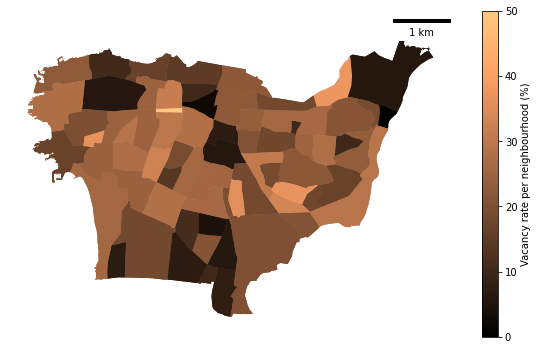

In [162]:
fig, ax = plt.subplots()


geo_neighbourhoods.plot(ax=ax, 
                        column='vacancy rate', 
                        cmap='copper', 
                        legend=True,
                        legend_kwds={'label': "Vacancy rate per neighbourhood (%)",})
plt.xticks([])
plt.yticks([])
scalebar = ScaleBar(1.0, 'm', label_loc='bottom')
ax.add_artist(scalebar)
ax.set(frame_on=False)

In [171]:
geo_neighbourhoods['vacancy rate'] = geo_neighbourhoods['vacancy rate'].clip(lower=0, upper=40)
#geo_neighbourhoods['vacancy rate'].hist()

## Neighbourhood vacancy rate, categorized discreet variable 



[None]

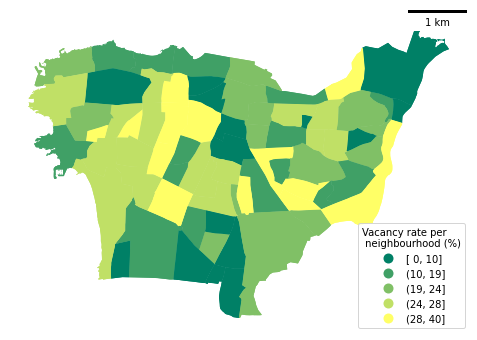

In [175]:
fig, ax = plt.subplots()


geo_neighbourhoods.plot(ax=ax, 
                        column='vacancy rate', 
                        scheme='Quantiles',
                        k=5,
                        cmap='summer', 
                        legend=True,
                        legend_kwds={'title': "Vacancy rate per \n neighbourhood (%)", 
                                     'loc': 'lower right', 
                                     'fmt': '{:.0f}'})
plt.xticks([])
plt.yticks([])
scalebar = ScaleBar(1.0, 'm', label_loc='bottom')
ax.add_artist(scalebar)
ax.set(frame_on=False)

## Rental and sale prices as continuous variables 

[None]

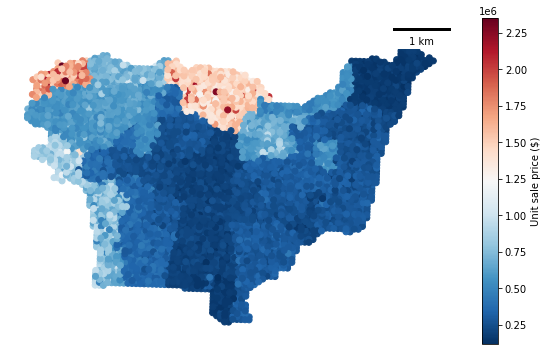

In [165]:
fig, ax = plt.subplots()

ownership = m.datacollector.get_table_dataframe('housing unit ownership')
geo_ownership = gpd.GeoDataFrame(ownership)
geo_ownership = geo_ownership.set_crs(epsg=4326)
geo_ownership = geo_ownership.to_crs(epsg=32637)

geo_ownership.plot(ax=ax, 
                   column='price sale', 
                   cmap='RdBu_r', 
                   legend=True,
                   legend_kwds={'label': "Unit sale price ($)",})


scalebar = ScaleBar(1.0, 'm', label_loc='bottom')
ax.add_artist(scalebar)

plt.xticks([])
plt.yticks([])
ax.set(frame_on=False)

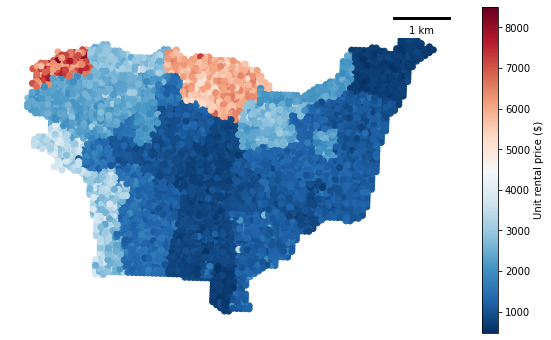

In [166]:
fig, ax = plt.subplots()

geo_ownership.plot(ax=ax, 
                   column='price rent', 
                   cmap='RdBu_r', 
                   legend=True,
                   legend_kwds={'label': "Unit rental price ($)",})
plt.xticks([])
plt.yticks([])
ax.set(frame_on=False)

scalebar = ScaleBar(1.0, 'm', label_loc='bottom')
ax.add_artist(scalebar)

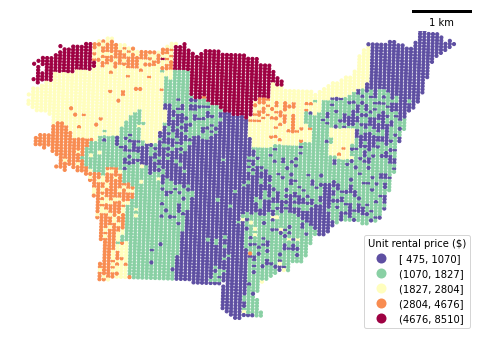

In [167]:
fig, ax = plt.subplots()

geo_ownership.plot(ax=ax, 
                   column='price rent', 
                   scheme='FisherJenks',
                   k=5,
                   cmap='Spectral_r', 
                   markersize=10,
                   legend=True,
                   legend_kwds={'fmt': '{:.0f}', 
                                'title': 'Unit rental price ($)'})
plt.xticks([])
plt.yticks([])
ax.set(frame_on=False)

scalebar = ScaleBar(1.0, 'm', label_loc='bottom')
ax.add_artist(scalebar)

In [168]:
fig, ax = plt.subplots()


geo_neighbourhoods_wgs = geo_neighbourhoods.to_crs(epsg=4326)
geo_ownership = geo_ownership.to_crs(epsg=32637)
geo_ownership.plot(ax=ax, 
                   column='tenure type', 
                   cmap='Paired_r',
                   categorical=True,
#                   categories= ['investment', 'ownership'],
#                   marker='s', 
                   markersize=10,
                   legend=True,
                   legend_kwds={'title': "Tenure type", 'loc': 'lower right'})
#                   legend_kwds={'title': "rental typpe", 'labels': ['investment', 'ownnership'] })
#plt.legend()
plt.xticks([])
plt.yticks([])
ax.set(frame_on=False)
#geo_neighbourhoods_wgs.plot(ax=ax, facecolor='none', edgecolor='black')

scalebar = ScaleBar(1.0, 'm', label_loc='bottom')
ax.add_artist(scalebar)

In [14]:
from agents.housing_unit import HousingUnitAgent
m.schedule.step_breed(HousingUnitAgent, step_name='record_data')
o = m.datacollector.get_table_dataframe('housing unit ownership')
o.head()

step  unit id                                     geometry  area       pos  \
0     0     3578   POINT (35.5091078075593 33.88591209107744)    94  (55, 51)   
1     0     1257  POINT (35.48630666514068 33.89186347838866)   105  (25, 64)   
2     0     4598  POINT (35.52278849301048 33.89140567936472)    94  (73, 63)   
3     0     2926  POINT (35.50302750291434 33.89552587058017)   219  (47, 72)   
4     0      325  POINT (35.47490609393137 33.88865888522108)   141  (10, 57)   

    x   y          legend tenure type investor category  investor id  \
0  55  51      off market  investment           amateur      10042.0   
1  25  64  household home   ownership              None          NaN   
2  73  63  household home   ownership              None          NaN   
3  47  72  household home   ownership              None          NaN   
4  10  57  household home   ownership              None          NaN   

  on market  price rent  price sale  price sale init  price rent init  \
0        no    1290.808      322702           322702         1290.808   
1        no    1739.640      434910           434910         1739.640   
2        no    1253.208      313302           313302         1253.208   
3        no    6257.268     1564317          1564317         6257.268   
4        no    3202.392      800598           800598         3202.392   

   rent delta  sale delta  
0         0.0         0.0  
1         0.0         0.0  
2         0.0         0.0  
3         0.0         0.0  
4         0.0         0.0

owned by a household    7236
on sale market          1432
currently rented        1122
off market               824
on rental market         240
Name: legend, dtype: int64


Text(0, 0.5, '')

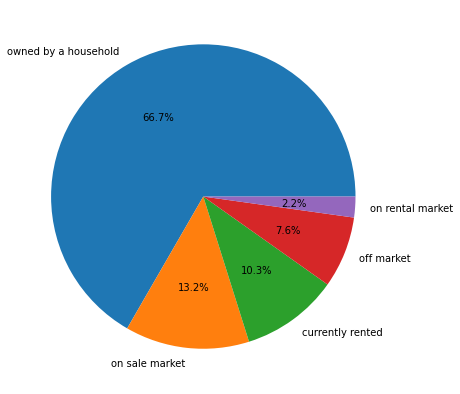

In [23]:
legend = o['legend'].value_counts()
legend = legend.rename({'rent': 'on rental market', 
               'sale': 'on sale market', 
               'rented': 'currently rented', 
               'household home': 'owned by a household'})
print(legend)
legend.plot.pie(autopct='%1.1f%%', figsize=(10,7))
plt.ylabel('')


In [19]:

ownership = m.datacollector.get_table_dataframe('housing unit ownership')

ownership_0 = ownership[ownership['step'] == 0]
ownership_0 = gpd.GeoDataFrame(ownership_0)

ownership_0 = ownership_0.set_crs(epsg=4326)
ownership_0 = ownership_0.to_crs(epsg=32637)
ownership_0.head()

step  unit id                        geometry  area       pos   x   y  \
0     0     3311  POINT (176873.354 3754036.509)    97  (52, 32)  52  32   
1     0     4125  POINT (177717.415 3754007.826)    92  (64, 32)  64  32   
2     0      121  POINT (173512.363 3756643.399)   225   (3, 81)   3  81   
3     0     3579  POINT (177118.919 3755045.227)    91  (55, 52)  55  52   
4     0      893  POINT (174702.594 3756449.952)   126  (20, 78)  20  78   

           legend tenure type investor category  investor id on market  \
0          rented  investment           amateur      10112.0    rented   
1            sale  investment           amateur       9882.0      sale   
2            sale  investment           amateur       9938.0      sale   
3  household home   ownership              None          NaN        no   
4  household home   ownership              None          NaN        no   

   price rent  price sale  price sale init  price rent init  rent delta  \
0    1249.748    312437.0           312437         1249.748         0.0   
1    1219.552    304888.0           304888         1219.552         0.0   
2    7650.000   1912500.0          1912500         7650.000         0.0   
3    1382.108    345527.0           345527         1382.108         0.0   
4    2273.040    568260.0           568260         2273.040         0.0   

   sale delta  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

In [28]:
from matplotlib.colors import ListedColormap

legend = ListedColormap(['#d9d9d9', # grey 
                         '#f1d341', # yellow
                         '#1f5cad', # blue
                         '#78a4de', # light blue 
                         '#1fad5a', # green
                        ])
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

ownership_0.plot(column='legend', 
                 ax=axs[0],
                 legend=True,
                 cmap=legend,
                 legend_kwds={'title': "Tenure status at initialization",},
                 marker='o',
                 markersize=11,)
scalebar_a = ScaleBar(1.0, 'm', label_loc='bottom')
axs[0].add_artist(scalebar_a)


ownership_0.plot(column='price sale', 
                 ax=axs[1],
                 legend=True,
                 legend_kwds={'label': "Sale price in hundreds of thousands of USD at initalization",},
                 cmap='RdBu_r',
                 marker='o',
                 markersize=11,)

scalebar_b = ScaleBar(1.0, 'm', label_loc='bottom')
axs[1].add_artist(scalebar_b)

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set(frame_on=False)
    geo_neighbourhoods.plot(ax=ax, facecolor="none", edgecolor="#808080")
    